In [45]:
import pandas as pd
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
d_cpm = pd.read_csv("analysis_21069I_0813_Deborah/results/expr/filtered_cpm.tsv", sep="\t", index_col=[0, 1])

metadata = pd.read_csv("analysis_21069I_0813_Deborah/metadata.tsv", sep="\t", index_col=0)
d_cpm_log2 = d_cpm.apply(lambda x: np.log2(x + 1))


In [47]:
dat_long = d_cpm_log2.melt(var_name="sample", value_name="log2cpm").merge(metadata, left_on="sample", right_index=True)

<AxesSubplot:xlabel='log2cpm', ylabel='Density'>

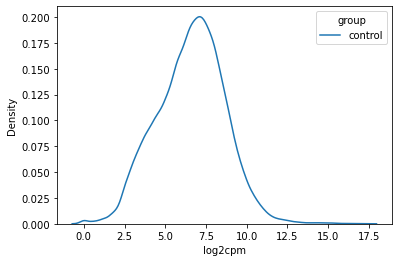

In [48]:
sns.kdeplot(x="log2cpm", hue="group", data=dat_long, common_norm=False)

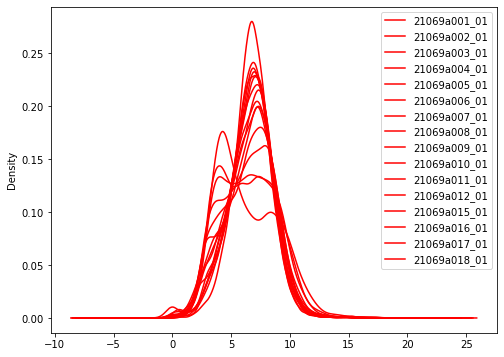

In [53]:
# group_colors_df = pd.read_csv("analysis_21069I_0813_Deborah/intermediate/group_colors.tsv", sep="\t", index_col=0)
# group_colors_dict = dict(group_colors_df["color"])
group_colors_dict = {'batch1':'red','batch2':'blue'}
fig, ax = plt.subplots(figsize=(8,6))
for label, df in dat_long.groupby("sample"):
    # print(df["group"].iloc[0])
    df["log2cpm"].plot(kind="kde", ax=ax, label=label, color=group_colors_dict[df["run_name"].iloc[0]])
plt.legend()